In [1]:
import numpy as np
import matplotlib.pyplot as plt

# More on Numeric Optimization

Recall that in homework 2, in one problem you were asked to maximize the following function:
    
\begin{align}
f(x) & = -7x^2 + 930x + 30
\end{align}
    
Using calculus, you found that $x^* = 930/14=66.42857$ maximizes $f$. You also used a brute force method to find $x^*$ that involved computing $f$ over a grid of $x$ values. That approach works but is inefficient.

An alternative would be to use an optimizaton algorithm that takes an initial guess and proceeds in a deliberate way. The `fmin` function from `scipy.optimize` executes such an algorithm. `fmin` takes as arguments a *function* and an ititial guess. It iterates, computing updates to the initial guess until the function appears to be close to a *minimum*. It's standard for optimization routines to minimize functions. If you want to maximize a function, supply the negative of the desired function to `fmin`.

## Example using `fmin`

Let's use `fmin` to solve the problem from Homework 2. First, import `fmin`.

In [2]:
from scipy.optimize import fmin

Next, define a function that returns $-(-7x^2 + 930x + 30)$. We'll talk in class later about how to do this.

In [3]:
def quadratic(x):
    return -(-7*x**2 + 930*x + 30)

Now call `fmin`. We know that the exact solution, but let's guess something kind of far off. Like $x_0 = 10$.

In [4]:
x_star = fmin(quadratic,x0=10)

print()
print('fmin solution: ',x_star[0])
print('exact solution:',930/14)

Optimization terminated successfully.
         Current function value: -30919.285714
         Iterations: 26
         Function evaluations: 52

fmin solution:  66.4285888671875
exact solution: 66.42857142857143


`fmin` iterated 26 times and evaluated the function $f$ only 52 times. The solution is accurate to 4 digits. The same accuracy in the assignment would be obtained by setting the step to 0.00001 in constructing `x`.Wtih min and max values of 0 and 100, `x` would have 10,000,000 elements implying that the funciton $f$ would have to be evaluated that many times. Greater accuracy would imply ever larger numbers of function evaluations.

To get a sense of the iterative process that `fmin` uses, we can request that the function return the value of $x$ at each iteration using the argument `retall=True`.

In [5]:
x_star, x_values = fmin(quadratic,x0=10,retall=True)

print()
print('fmin solution: ',x_star[0])
print('exact solution:',930/14)

Optimization terminated successfully.
         Current function value: -30919.285714
         Iterations: 26
         Function evaluations: 52

fmin solution:  66.4285888671875
exact solution: 66.42857142857143


We can plot the iterated values to see how the routine converges.

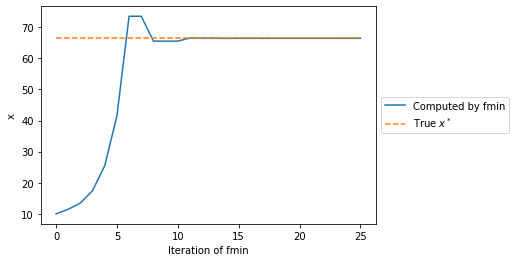

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Iteration of fmin')
ax.set_ylabel('x')
ax.plot(x_values,label="Computed by fmin")
ax.plot(np.zeros(len(x_values))+930/14,'--',label="True $x^*$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Accuracy of the `fmin` result can be improved by reducing the `xtol` and `ftol` arguments. These arguments specify the required maximum magnitide between iterations of $x$ and $f$ that is acceptable for algorithm convergence. Both default to 0.0001.

Let's try `xtol=1e-7`.

In [7]:
fmin(quadratic,x0=10,xtol=1e-7)

Optimization terminated successfully.
         Current function value: -30919.285714
         Iterations: 36
         Function evaluations: 75


array([66.42857122])

The result is accurate to an additional decimal place. Greater accuracy will be hard to achieve with `fmin` because the function is large in absolute value at the maximum. We can improve accuracy by scaling the function by 1/30,000.

In [8]:
def quadratic_2(x):
    return -(-7*(x)**2 + 930*(x) + 30)/30000

x_star = fmin(quadratic_2,x0=930/14,xtol=1e-7)
print()
print('fmin solution: ',x_star[0])
print('exact solution:',930/14)

Optimization terminated successfully.
         Current function value: -1.030643
         Iterations: 26
         Function evaluations: 54

fmin solution:  66.42857142857143
exact solution: 66.42857142857143


Now the computed solution is accurate to 14 decimal places.

## Another example

Consider the polynomial function:

\begin{align}
f(x) & = -\frac{(x-1)(x-2)(x-7)(x-9)}{200}
\end{align}

The function has two local maxima which can be seen by plotting.

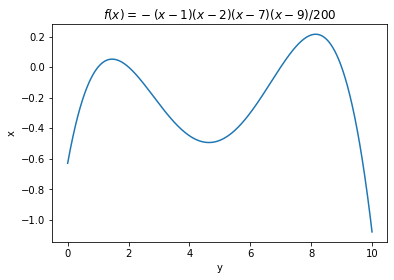

In [9]:
def polynomial(x):
    '''Funciton for computing the NEGATIVE of the polynomial'''
    return (x-1)*(x-2)*(x-7)*(x-9)/200

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_title('$f(x) = -(x-1)(x-2)(x-7)(x-9)/200$')

x = np.linspace(0,10,1000)
plt.plot(x,-polynomial(x))

Now, let's use `fmin` to compute the maximum of $f(x)$. Suppose that our initial guess is $x_0=4$.

In [10]:
x_star,x_values = fmin(polynomial,x0=4,retall=True)

print()
print('fmin solution: ',x_star[0])

Optimization terminated successfully.
         Current function value: -0.051881
         Iterations: 18
         Function evaluations: 36

fmin solution:  1.4611328124999978


The routine apparently converges on a value that is only a local maximum because the inital guess was not properly chosen. To see how `fmin` proceeded, plot the steps of the iterations on the curve:

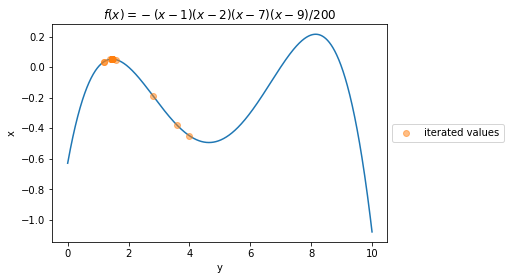

In [11]:
# Redefine x_values because it is a list of one-dimensional Numpy arrays. Not convenient.
x_values = np.array(x_values).T[0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_title('$f(x) = -(x-1)(x-2)(x-7)(x-9)/200$')

plt.plot(x,-polynomial(x))
plt.plot(x_values,-polynomial(x_values),'o',alpha=0.5,label='iterated values')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

`fmin` takes the intial guess and climbs the hill to the left. So apparently the ability of the routine to find the maximum depends on the quality of the initial guess. That's why plotting is important. We can see that beyond about 5.5, the function ascends to the global max. So let's guess $x_0 = 6$.

In [12]:
x_star,x_values = fmin(polynomial,x0=6,retall=True)

print()
print('fmin solution: ',x_star[0])

Optimization terminated successfully.
         Current function value: -0.214917
         Iterations: 17
         Function evaluations: 34

fmin solution:  8.147973632812505


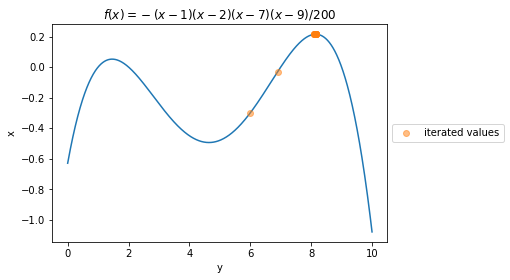

In [13]:
# Redefine x_values because it is a list of one-dimensional Numpy arrays. Not convenient.
x_values = np.array(x_values).T[0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_title('$f(x) = -(x-1)(x-2)(x-7)(x-9)/200$')

plt.plot(x,-polynomial(x))
plt.plot(x_values,-polynomial(x_values),'o',alpha=0.5,label='iterated values')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

`fmin` converges to the global maximum.

## Solving systems of equations

A related problem to numeric optimization is finding the solutions to systems of equations. Consider the problem of mximizing utility:

\begin{align}
U(x,1,x_2) & =  x_1^{\alpha} x_2^{\beta}
\end{align}

subject to the budget constraint:

\begin{align}
M & = p_1x_1 + p_2x_2
\end{align}

by choosing $x_1$ and $x_2$. Solve this by constructing the Lagrangian function:

\begin{align}
\mathcal{L}(x_1,x_2,\lambda) & = x_1^{\alpha} x_2^{\beta} + \lambda \left(M - p_1x_1 - p_2x_2\right)
\end{align}

where $\lambda$ is the Lagrange multiplier on the constraint. The first-order conditions represent a system of equations to be solved:

\begin{align}
\alpha x1^{\alpha-1} x2^{\beta} - \lambda p_1 & = 0\\
\beta x1^{\alpha} x2^{\beta-1} - \lambda p_2 & = 0\\
M - p_1x_1 - p_2 x_2 & = 0\\
\end{align}

Solved by hand, you find:

\begin{align}
x_1^* & = \left(\frac{\alpha}{\alpha+\beta}\right)\frac{M}{p_1}\\
x_1^* & = \left(\frac{\beta}{\alpha+\beta}\right)\frac{M}{p_2}\\
\lambda^* & = \left(\frac{\alpha}{p_1}\right)^{\alpha}\left(\frac{\beta}{p_2}\right)^{\beta}\left(\frac{M}{\alpha+\beta}\right)^{\alpha+\beta - 1}
\end{align}

But solving this problem by hand was tedious. If we knew values for $\alpha$, $\beta$, $p_1$, $p_2$, and $M$, then we could use an equation solver to solve the system. The one we'll use is called `fsolve` from `scipy.optimize`.

For the rest of the example, assumethe following parameter values:

| $\alpha$ | $\beta$ | $p_1$ | $p_2$ | $M$   |
|----------|---------|-------|-------|-------|
| 0.25     | 0.75    | 1     |  2    |  100  |

First, import `fsolve`.

In [14]:
from scipy.optimize import fsolve

Define variables to store parameter values and compute exact solution

In [15]:
# Parameters
alpha = 0.25
beta = 0.75
p1 = 1
p2 = 2
m = 100

# Solution
x1_star = m/p1*alpha/(alpha+beta)
x2_star = m/p2*beta/(alpha+beta)
lam_star = x_star = alpha**alpha*beta**beta*p1**-alpha*p2**-beta

exact_soln = np.array([x1_star,x2_star,lam_star])

Next, define a function that returns the system of equations solved for zero. I.e., when the solution is input into the function, it return an array of zeros.

In [16]:
def system(x):
    
    x1,x2,lam = x
    
    retval = np.zeros(3)

    retval[0] = alpha*x1**(alpha-1)*x2**beta - lam*p1
    retval[1] = beta*x1**alpha*x2**(beta-1) - lam*p2
    retval[2] = m - p1*x1 - p2*x2
    
    return retval

Solve the system with `fsolve`. Set initial guess for $x_1$, $x_2$, and $\lambda$ to 1, 1, and 1.

In [17]:
approx_soln = fsolve(system,x0=[1,1,1])

print('Approximated solution:',approx_soln)
print('Exact solution:      ',exact_soln)

Approximated solution: [25.         37.5         0.33885075]
Exact solution:       [25.         37.5         0.33885075]


Apparently the solution form fsolve is highly accurate. However, we can (and should) verify that original system is in fact equal to zero at the values returned by `fsolve`. Use `np.isclose` to test.

In [18]:
np.isclose(system(approx_soln),0)

array([ True,  True,  True])

Note that like `fmin`, the results of `fsolve` are sensitive to the intial guess. Suppose we guess 1000 for $x_1$ and $x_2$.

In [19]:
approx_soln = fsolve(system,x0=[1000,1000,1])

approx_soln

/Users/bcjenkin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/Users/bcjenkin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/bcjenkin/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([1000., 1000.,    1.])

The routine does not converge on the solution. The lesson is that with numerical routines for optimization and equation solving, you have to use juedgment in setting initial guesses and it helps to think carefully about the problem that you are solving beforehand.